In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(palette='rainbow')

In [2]:
#sklearn
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression

In [3]:
#loading the data
data = pd.read_csv('heart.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### TRAIN TEST SPLIT

In [6]:
#featured data
featured_x = data.drop('target',axis=1)
#target or label data
target_y = data['target']

In [7]:
#np.random.seed(13)

x_train,x_test,y_train,y_test = train_test_split(featured_x,target_y,test_size=0.2)

model = LogisticRegression()

#finding pattern
model.fit(x_train,y_train)

C:\Users\Nill\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [8]:
#getting the score

In [9]:
model.score(x_test,y_test)

0.8688524590163934

In [10]:
#######################################
#
#
## Hyperparameter tunning by RandomizeSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [11]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
from sklearn.model_selection import RandomizedSearchCV

In [13]:
logReg_grid = {'C': np.logspace(-4,4,20), 
              'solver':['liblinear']}

In [14]:
#Tune the paramaters

In [15]:
#np.random.seed(21)

randomSearch_log = RandomizedSearchCV(LogisticRegression(),param_distributions=logReg_grid,cv=5,n_iter=20,verbose=True)

#Fitting the model with RandomizedSearchCV

randomSearch_log.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [16]:
#best_params_
randomSearch_log.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [17]:
#evaluate on test data
randomSearch_log.score(x_test,y_test)

0.8688524590163934

# GRID SEARCH CV

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
logReg_grid #Used for randomSearchCV

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'solver': ['liblinear']}

In [20]:
#for GridSearchCV
Grid_search_log = {'C':np.logspace(-4,4,40),
                  'solver':['liblinear']} 


In [21]:
#settings the hyperparameter
grid_logistic = GridSearchCV(LogisticRegression(),param_grid=Grid_search_log,cv=5,verbose=True)

#fitting

grid_logistic.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e-01, 4.923882...652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [22]:
#best_params_

In [23]:
grid_logistic.best_params_

{'C': 0.49238826317067363, 'solver': 'liblinear'}

In [24]:
#evaluate new score

In [25]:
grid_logistic.score(x_test,y_test)

0.8688524590163934

In [26]:
######################## RandomizedSearchCV, GridSearchCV #######################
randomSearch_log.score(x_test,y_test) , grid_logistic.score(x_test,y_test)

(0.8688524590163934, 0.8688524590163934)

## Evaluate more to get the best accuracy

In [27]:
#Compare the predict value using gridSearchCV with the original test data

In [28]:
y_preds = grid_logistic.predict(x_test)

In [29]:
y_preds

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [30]:
np.array(y_test)

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

## ROC CURVE

In [33]:
from sklearn.metrics import roc_curve,plot_roc_curve #TO calculate AUC (area under curver) # 
#A perfect model will have auc == 1

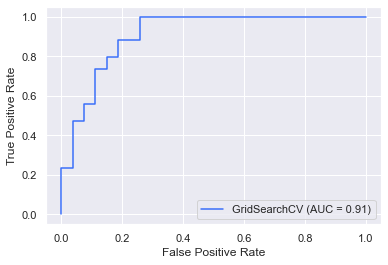

In [35]:
plot_roc_curve(grid_logistic,x_test,y_test); 

## CONFUSION MATRIX

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test,y_preds)

array([[20,  7],
       [ 1, 33]], dtype=int64)

In [38]:
#visualize the confusion matrix with heatmap
def plot_confusion_matrix(y_test,y_preds):
    fig,ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False,cmap='summer')
    
    plt.xlabel('True Label')
    plt.ylabel('Predictable Label')
    
    plt.show()
    

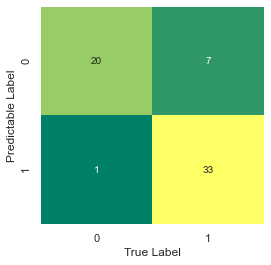

In [39]:
plot_confusion_matrix(y_test,y_preds)

In [41]:
# here the annot value = Top_right, is false negative = model predict 0(negative) when the truth is 1 which means False negative predict
# here the annot value = Bottom_left, is false positive = model predict 1(positive) when the truth is 0 which means False positive predict

### More metrics Functions for more model summary
* Classification Report
* cv Precision
* F1 score
* Recall score

In [42]:
from sklearn.metrics import classification_report,precision_score,f1_score,recall_score

In [44]:
#simple classification report #only on one simple test data not cross validated
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83        27
           1       0.82      0.97      0.89        34

    accuracy                           0.87        61
   macro avg       0.89      0.86      0.86        61
weighted avg       0.88      0.87      0.87        61



* precision = A model that has no False positive will be value of 1.00
* recall = A model that has no False Negative will be value of 1.00
* f1 = is a combination of precision and recall
* support = samples, like how many of the sample values has 1(heart disease) or 0(not heart Disease)

### Using cross-validation evaluate precision,f1,recall

#### scoring parameter

In [49]:
from sklearn.model_selection import cross_val_score

In [46]:
#best_params
grid_logistic.best_params_

{'C': 0.49238826317067363, 'solver': 'liblinear'}

In [47]:
#creating the classifier for LogisticRegression

In [48]:
clf_best = LogisticRegression(C=0.49238826317067363, solver='liblinear')

### ACCURACY

In [50]:

cv_accuracy = cross_val_score(clf_best,featured_x,target_y,cv=5,scoring='accuracy')
cv_accuracy

array([0.81967213, 0.86885246, 0.85245902, 0.86666667, 0.75      ])

In [53]:
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8315300546448088

### PRECISION

In [54]:
cv_precision = cross_val_score(clf_best,featured_x,target_y,scoring='precision')

cv_precision = np.mean(cv_precision)
cv_precision

0.8139133786192609

### RECALL

In [55]:
cv_recall = cross_val_score(clf_best,featured_x,target_y,scoring='recall')

cv_recall = np.mean(cv_recall)
cv_recall

0.9030303030303031

### F1_SCORE

In [56]:
cv_f1 = cross_val_score(clf_best,featured_x,target_y,scoring='f1')

cv_f1 = np.mean(cv_f1)
cv_f1

0.8548018845463131

### Visualize the Cross_Validate metrics

In [57]:
cv_metrics_dict = {'Accuracy':cv_accuracy,
                  'Precision':cv_precision,
                  'Recall':cv_recall,
                  'F1':cv_f1}

In [58]:
cv_metrics_df = pd.DataFrame(cv_metrics_dict,index=[0])

In [59]:
cv_metrics_df

,Accuracy,Precision,Recall,F1
0,0.83153,0.813913,0.90303,0.854802


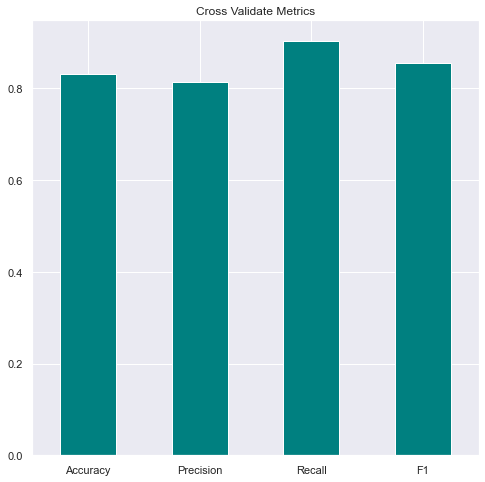

In [66]:
cv_metrics_df.T.plot(figsize=(8,8),color='teal',legend=False,title='Cross Validate Metrics',kind='bar')
plt.xticks(rotation=0)

plt.show()

## FEATURE IMPORTANCE

In [67]:
clf_best.fit(x_train,y_train)

LogisticRegression(C=0.49238826317067363, solver='liblinear')

In [68]:
#getting the co_efficient of features
clf_best.coef_

array([[ 0.01141036, -1.08719725,  0.79397407, -0.01441849, -0.00413828,
         0.00979501,  0.60857777,  0.02913706, -0.51718839, -0.50713164,
         0.38791915, -0.69798671, -0.78351644]])

In [73]:
#Matching it to the columns name
feature_dict = dict(zip(data.columns, list(clf_best.coef_[0])))

In [74]:
feature_dict

{'age': 0.011410364567361749,
 'sex': -1.0871972484357233,
 'cp': 0.7939740724917342,
 'trestbps': -0.014418489026359742,
 'chol': -0.0041382831441811865,
 'fbs': 0.00979501477943635,
 'restecg': 0.6085777669684495,
 'thalach': 0.029137057271899976,
 'exang': -0.5171883856749715,
 'oldpeak': -0.5071316409276222,
 'slope': 0.3879191471305879,
 'ca': -0.6979867071698944,
 'thal': -0.7835164371475649}

In [75]:
feature_coef_df = pd.DataFrame(feature_dict,index=[0])

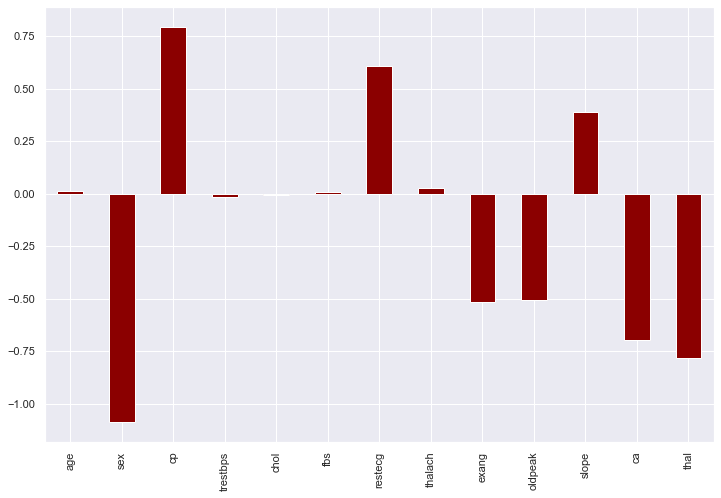

In [82]:
feature_coef_df.T.plot(kind='bar',figsize=(12,8),legend=False,color=['darkred']);

In [78]:
#Checking with SEX and Target

pd.crosstab(data['sex'],data['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [81]:
#cheking CP with Target
pd.crosstab(data['cp'],data['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16
